### **1. Loading the data**

In [1]:
import pandas as pd
import numpy as np

import os

from PIL import Image
import matplotlib.pyplot as plt

In [2]:
path = 'data/.raw-img/'

### **What are the file extensions?**

In [3]:
file_extensions = []
for root, dirs, files in os.walk(path):
    print(f"Reading images from {root}. Found {len(files)} files.")
    for file_name in files:
        file_extensions.append(os.path.splitext(file_name)[-1])
        file_path = os.path.join(root, file_name)

print(len(file_extensions))
print(set(file_extensions))

Reading images from data/.raw-img/. Found 0 files.
Reading images from data/.raw-img/cane. Found 4863 files.
Reading images from data/.raw-img/cavallo. Found 2623 files.
Reading images from data/.raw-img/elefante. Found 1446 files.
Reading images from data/.raw-img/farfalla. Found 2112 files.
Reading images from data/.raw-img/gallina. Found 3098 files.
Reading images from data/.raw-img/gatto. Found 1668 files.
Reading images from data/.raw-img/mucca. Found 1866 files.
Reading images from data/.raw-img/pecora. Found 1820 files.
Reading images from data/.raw-img/ragno. Found 4821 files.
Reading images from data/.raw-img/scoiattolo. Found 1862 files.
26179
{'.png', '.jpeg', '.jpg'}


### **What are the image sizes, extension and mode?**

In [4]:
def read_image_files(path):
    images_data = []
    for root, dirs, files in os.walk(path):
        print(f"Reading images from {root}. Found {len(files)} files.")
        for file_name in files:
            extension = os.path.splitext(file_name)[-1]
            if extension in file_extensions:
                file_path = os.path.join(root, file_name)
                img = Image.open(file_path)
                images_data.append({"file_name": file_name,
                                    "extension": extension, 
                                    "size": img.size, 
                                    "mode": img.mode, 
                                    "dir": root})
    return images_data

def load_into_df(images_data):
    df = pd.DataFrame(images_data)
    return df

In [5]:
%%time

images_data = read_image_files(path)

df = load_into_df(images_data)

df.head()

Reading images from data/.raw-img/. Found 0 files.
Reading images from data/.raw-img/cane. Found 4863 files.
Reading images from data/.raw-img/cavallo. Found 2623 files.
Reading images from data/.raw-img/elefante. Found 1446 files.
Reading images from data/.raw-img/farfalla. Found 2112 files.
Reading images from data/.raw-img/gallina. Found 3098 files.
Reading images from data/.raw-img/gatto. Found 1668 files.
Reading images from data/.raw-img/mucca. Found 1866 files.
Reading images from data/.raw-img/pecora. Found 1820 files.
Reading images from data/.raw-img/ragno. Found 4821 files.
Reading images from data/.raw-img/scoiattolo. Found 1862 files.
CPU times: total: 11.4 s
Wall time: 40.2 s


,file_name,extension,size,mode,dir
0,OIF-e2bexWrojgtQnAPPcUfOWQ.jpeg,.jpeg,"(300, 225)",RGB,data/.raw-img/cane
1,OIP---A27bIBcUgX1qkbpZOPswHaFS.jpeg,.jpeg,"(300, 214)",RGB,data/.raw-img/cane
2,OIP---cByAiEbIxIAleGo9AqOQAAAA.jpeg,.jpeg,"(153, 300)",RGB,data/.raw-img/cane
3,OIP---ZIdwfUcJeVxnh47zppcQHaFj.jpeg,.jpeg,"(300, 225)",RGB,data/.raw-img/cane
4,OIP---ZRsOF7zsMqhW30WeF8-AHaFj.jpeg,.jpeg,"(300, 225)",RGB,data/.raw-img/cane


In [6]:
df["extension"].value_counts()

extension
.jpeg    24209
.jpg      1919
.png        51
Name: count, dtype: int64

In [7]:
df["mode"].value_counts()

mode
RGB     26128
RGBA       49
L           1
CMYK        1
Name: count, dtype: int64

In [8]:
df["mode"].unique()

array(['RGB', 'RGBA', 'L', 'CMYK'], dtype=object)

In [9]:
df["dir"].value_counts()

dir
data/.raw-img/cane          4863
data/.raw-img/ragno         4821
data/.raw-img/gallina       3098
data/.raw-img/cavallo       2623
data/.raw-img/farfalla      2112
data/.raw-img/mucca         1866
data/.raw-img/scoiattolo    1862
data/.raw-img/pecora        1820
data/.raw-img/gatto         1668
data/.raw-img/elefante      1446
Name: count, dtype: int64

In [10]:
df["dir"].unique()

array(['data/.raw-img/cane', 'data/.raw-img/cavallo',
       'data/.raw-img/elefante', 'data/.raw-img/farfalla',
       'data/.raw-img/gallina', 'data/.raw-img/gatto',
       'data/.raw-img/mucca', 'data/.raw-img/pecora',
       'data/.raw-img/ragno', 'data/.raw-img/scoiattolo'], dtype=object)

In [11]:
df["size"].value_counts()

size
(300, 225)    4397
(300, 200)    3281
(300, 300)    1192
(300, 169)    1048
(640, 426)     694
              ... 
(640, 463)       1
(463, 640)       1
(520, 640)       1
(543, 640)       1
(180, 213)       1
Name: count, Length: 1002, dtype: int64

In [12]:
df["size"].nunique()

1002

In [13]:
df["size"].unique()

array([(300, 225), (300, 214), (153, 300), ..., (246, 205), (263, 257),
       (180, 213)], dtype=object)

In [14]:
df.head()

,file_name,extension,size,mode,dir
0,OIF-e2bexWrojgtQnAPPcUfOWQ.jpeg,.jpeg,"(300, 225)",RGB,data/.raw-img/cane
1,OIP---A27bIBcUgX1qkbpZOPswHaFS.jpeg,.jpeg,"(300, 214)",RGB,data/.raw-img/cane
2,OIP---cByAiEbIxIAleGo9AqOQAAAA.jpeg,.jpeg,"(153, 300)",RGB,data/.raw-img/cane
3,OIP---ZIdwfUcJeVxnh47zppcQHaFj.jpeg,.jpeg,"(300, 225)",RGB,data/.raw-img/cane
4,OIP---ZRsOF7zsMqhW30WeF8-AHaFj.jpeg,.jpeg,"(300, 225)",RGB,data/.raw-img/cane


In [15]:
df["width"] = df['size'].apply(lambda size: size[0])
df["height"] = df['size'].apply(lambda size: size[1])

df.head()

,file_name,extension,size,mode,dir,width,height
0,OIF-e2bexWrojgtQnAPPcUfOWQ.jpeg,.jpeg,"(300, 225)",RGB,data/.raw-img/cane,300,225
1,OIP---A27bIBcUgX1qkbpZOPswHaFS.jpeg,.jpeg,"(300, 214)",RGB,data/.raw-img/cane,300,214
2,OIP---cByAiEbIxIAleGo9AqOQAAAA.jpeg,.jpeg,"(153, 300)",RGB,data/.raw-img/cane,153,300
3,OIP---ZIdwfUcJeVxnh47zppcQHaFj.jpeg,.jpeg,"(300, 225)",RGB,data/.raw-img/cane,300,225
4,OIP---ZRsOF7zsMqhW30WeF8-AHaFj.jpeg,.jpeg,"(300, 225)",RGB,data/.raw-img/cane,300,225


In [16]:
df.describe()

,width,height
count,26179.000000,26179.000000
mean,320.038810,252.630162
std,196.935326,148.403298
min,60.000000,57.000000
25%,300.000000,200.000000
50%,300.000000,225.000000
75%,300.000000,300.000000
max,6720.000000,6000.000000


In [17]:
# Calculate statistics
# Observe the Mean and Median Values of width and height

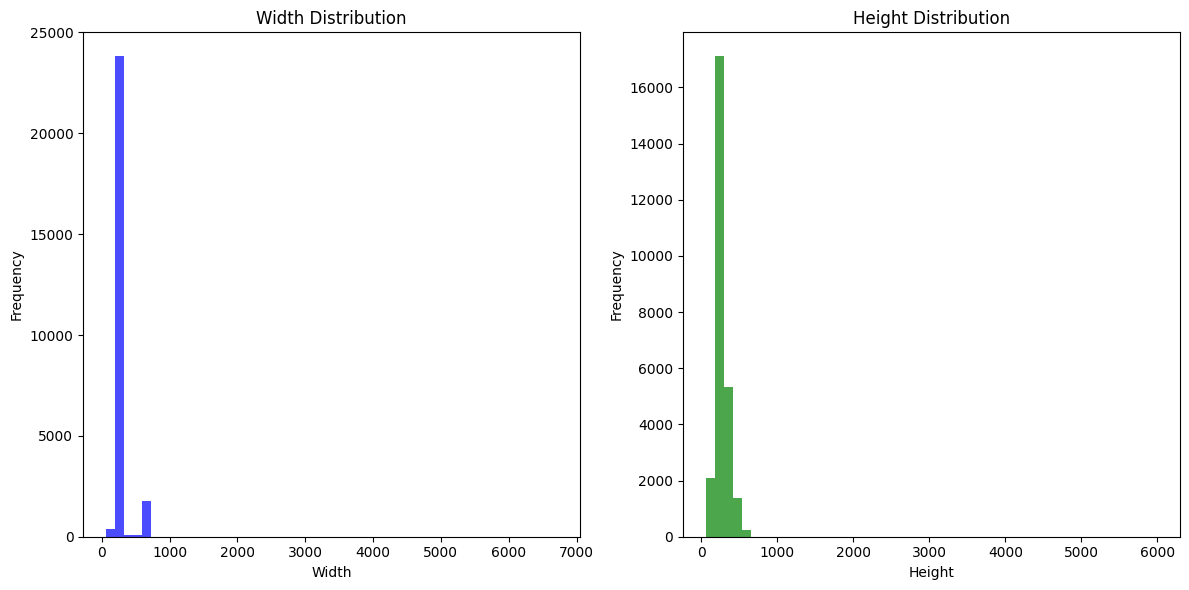

In [18]:
# Plot histogram of widths and heights
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.hist(df['width'], bins=50, color='blue', alpha=0.7)
plt.title('Width Distribution')
plt.xlabel('Width')
plt.ylabel('Frequency')

plt.subplot(1, 2, 2)
plt.hist(df['height'], bins=50, color='green', alpha=0.7)
plt.title('Height Distribution')
plt.xlabel('Height')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()


In [19]:
df.loc[df.width==df.width.min()]

,file_name,extension,size,mode,dir,width,height
5105,OIP-4UmK-NKWl1fwEK9GfBSGKAAAAA.jpeg,.jpeg,"(60, 57)",RGB,data/.raw-img/cavallo,60,57
5444,OIP-bT32YLeLizQNLnu4lcVGAAAAAA.jpeg,.jpeg,"(60, 57)",RGB,data/.raw-img/cavallo,60,57
6105,OIP-jqjnI-BWj-9BkPeqZetiggAAAA.jpeg,.jpeg,"(60, 57)",RGB,data/.raw-img/cavallo,60,57
6147,OIP-K8QgBSuaAkfMGBB_1C84uQAAAA.jpeg,.jpeg,"(60, 57)",RGB,data/.raw-img/cavallo,60,57
7431,OIP-zVErTw8mSPohwjPxvw6ehgAAAA.jpeg,.jpeg,"(60, 57)",RGB,data/.raw-img/cavallo,60,57


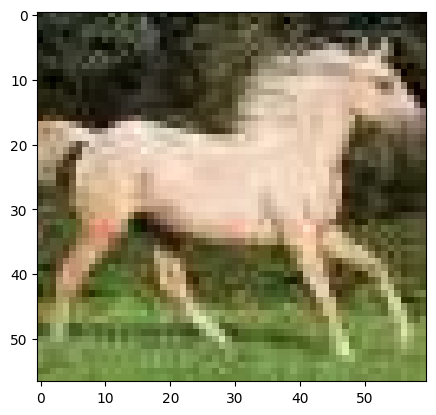

In [20]:
path = "data/.raw-img/cavallo/OIP-4UmK-NKWl1fwEK9GfBSGKAAAAA.jpeg"

img = Image.open(path)

plt.imshow(img)

(300, 225)


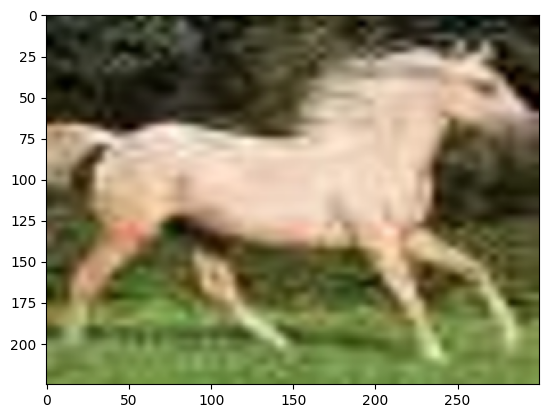

In [21]:
size = (300, 225)

img_new = img.resize(size)

print(img_new.size)

plt.imshow(img_new)

### **resize_with_aspect_ratio**

**This is for the following code**  
This approach resizes the image so that its smaller dimension matches the target size and pads the other dimension to maintain the aspect ratio.

By carefully choosing the image size based on dataset characteristics and task requirements, you can improve the efficiency and performance of your image classification model.

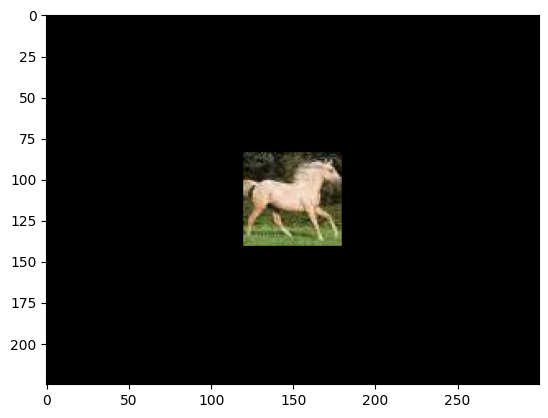

In [22]:
img.thumbnail(size)
new_image = Image.new("RGB", size)
new_image.paste(img, ((size[0] - img.size[0]) // 2,
                        (size[1] - img.size[1]) // 2))

plt.imshow(new_image)

## **Step 1: Read and Normalize Image Formats**

In [23]:
import os
from PIL import Image
import numpy as np


# Define the data directory
data_dir = 'data/.raw-img'

# List of class names (directories)
class_names = ['cane', 'cavallo', 'elefante', 'farfalla', 'gallina', 'gatto', 'mucca', 'pecora', 'ragno', 'scoiattolo']

# Define the image size for resizing
image_size = (300, 225)


def resize_with_aspect_ratio(image, target_size):
    image.thumbnail(target_size)
    new_image = Image.new("RGB", target_size, (255, 255, 255))
    new_image.paste(image, ((target_size[0] - image.size[0]) // 2,
                            (target_size[1] - image.size[1]) // 2))
    return new_image


# Function to load images and their labels
def load_images_and_labels(data_dir, class_names, image_size):
    images = []
    labels = []
    class_to_idx = {class_name: idx for idx, class_name in enumerate(class_names)}
    
    for class_name in class_names:
        class_dir = os.path.join(data_dir, class_name)
        for file_name in os.listdir(class_dir):
            file_path = os.path.join(class_dir, file_name)
            try:
                with Image.open(file_path) as img:
                    # Convert to RGB
                    img = img.convert('RGB')
                    # Resize image
                    img = resize_with_aspect_ratio(img, image_size)
                    images.append(np.array(img))
                    labels.append(class_to_idx[class_name])
            except Exception as e:
                print(f"Error processing {file_path}: {e}")
    
    return np.array(images), np.array(labels)

In [24]:
%%time

# Load images and labels
images, labels = load_images_and_labels(data_dir, class_names, image_size)

print(f"Loaded {len(images)} images with {len(class_names)} classes.")

Loaded 26179 images with 10 classes.
CPU times: total: 1min 46s
Wall time: 1min 51s


In [25]:
images.shape

(26179, 225, 300, 3)

In [27]:
labels.shape

(26179,)

## **Step 2: Normalize Pixel Values**

In [26]:
# Normalize images
images = images / 255.0

MemoryError: Unable to allocate 39.5 GiB for an array with shape (26179, 225, 300, 3) and data type float64

### **Normalize Images in Batches:**
1. Normalize and resize each image before appending it to the final dataset.

In [37]:
# Define batch size
batch_size = 1000

# Function to normalize and store images in batches
def process_and_store_images(images, labels, batch_size, output_dir):
    num_batches = len(images) // batch_size
    
    for i in range(num_batches):
        start_idx = i * batch_size
        end_idx = (i + 1) * batch_size
        batch_images = images[start_idx:end_idx] / 255.0  # Normalize
        batch_labels = labels[start_idx:end_idx]
        batch_path = os.path.join(output_dir, f'batch_{i}.npz')
        np.savez_compressed(batch_path, images=batch_images, labels=batch_labels)
        print(f"Created {batch_path} successfully.")
    
    # Process the remaining images (if any)
    remaining_images = images[num_batches * batch_size:] / 255.0
    remaining_labels = labels[num_batches * batch_size:]
    os.path.join(output_dir, f'batch_{num_batches}.npz')
    np.savez_compressed(batch_path, images=remaining_images, labels=remaining_labels)

In [38]:
from sklearn.model_selection import train_test_split

# Split images and labels into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(images, labels, 
                                                    test_size=0.2, 
                                                    random_state=42)

In [32]:
%%time 

# Create output directory for storing batches
output_dir = 'image_batches'
if not os.path.exists(output_dir):
    os.makedirs(output_dir)

# Process and store training images in batches
process_and_store_images(X_train, y_train, batch_size, output_dir)

CPU times: total: 16min 52s
Wall time: 17min 13s


In [33]:
# Normalize test data
X_test_normalize = X_test / 255.0

In [41]:
from sklearn.linear_model import SGDClassifier
from sklearn.metrics import accuracy_score

# Train Logistic Regression model using SGDClassifier
# loss parameter must be: 
# 'squared_hinge', 'hinge', 'perceptron', 'epsilon_insensitive', 
# 'modified_huber', 'squared_error', 'log_loss', 
# 'squared_epsilon_insensitive', 'huber'
model = SGDClassifier(loss='log_loss', max_iter=1000, tol=1e-3)

for i in range(len(os.listdir(output_dir))):
    try:
        batch_path = os.path.join(output_dir, f'batch_{i}.npz')
        print(f"Fitting on {batch_path}")
        batch_data = np.load(batch_path)
        batch_images, batch_labels = batch_data['images'], batch_data['labels']
        model.partial_fit(batch_images.reshape(batch_images.shape[0], -1), batch_labels, classes=np.unique(y_train))
    except Exception as e:
        print(f"Error loading batch {i}: {e}")


# Evaluate the model
y_pred = model.predict(X_test.reshape(X_test.shape[0], -1))
accuracy = accuracy_score(y_test, y_pred)
print(f"Test Accuracy: {accuracy}")

Fitting on image_batches\batch_0.npz
Error loading batch 0: Bad CRC-32 for file 'images.npy'
Fitting on image_batches\batch_1.npz
Fitting on image_batches\batch_2.npz
Fitting on image_batches\batch_3.npz
Fitting on image_batches\batch_4.npz
Fitting on image_batches\batch_5.npz
Fitting on image_batches\batch_6.npz
Fitting on image_batches\batch_7.npz
Fitting on image_batches\batch_8.npz
Fitting on image_batches\batch_9.npz
Fitting on image_batches\batch_10.npz
Fitting on image_batches\batch_11.npz
Fitting on image_batches\batch_12.npz
Fitting on image_batches\batch_13.npz
Fitting on image_batches\batch_14.npz
Fitting on image_batches\batch_15.npz
Fitting on image_batches\batch_16.npz
Fitting on image_batches\batch_17.npz
Fitting on image_batches\batch_18.npz
Fitting on image_batches\batch_19.npz
Fitting on image_batches\batch_20.npz
Test Accuracy: 0.23472116119174943


In [43]:
from sklearn.metrics import accuracy_score, classification_report

# Evaluate the classifier
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred, target_names=class_names)

print(f"Test Accuracy: {accuracy:.4f}")
print(report)

Test Accuracy: 0.2347
              precision    recall  f1-score   support

        cane       0.40      0.12      0.18       986
     cavallo       0.51      0.03      0.06       522
    elefante       0.17      0.05      0.07       307
    farfalla       0.26      0.16      0.20       420
     gallina       0.24      0.34      0.28       602
       gatto       0.13      0.30      0.18       333
       mucca       0.27      0.19      0.22       326
      pecora       0.15      0.69      0.24       380
       ragno       0.44      0.40      0.42       971
  scoiattolo       0.00      0.00      0.00       389

    accuracy                           0.23      5236
   macro avg       0.26      0.23      0.19      5236
weighted avg       0.30      0.23      0.21      5236



## **Step 5: Visualize Some Results**

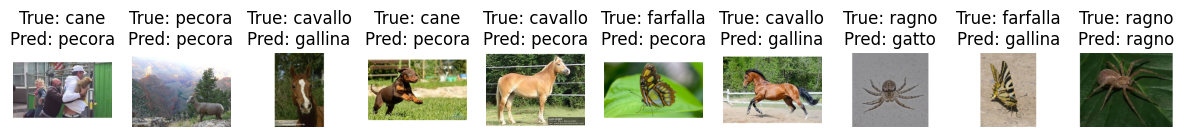

In [44]:
import matplotlib.pyplot as plt

# Function to plot images with their predicted labels
def plot_images(images, labels, preds, class_names, n=10):
    plt.figure(figsize=(15, 15))
    for i in range(n):
        plt.subplot(1, n, i + 1)
        plt.imshow(images[i])
        plt.title(f"True: {class_names[labels[i]]}\nPred: {class_names[preds[i]]}")
        plt.axis('off')
    plt.show()

# Plot some test images with their predicted labels
plot_images(X_test, y_test, y_pred, class_names, n=10)


Summary  
Data Loading: We read images from the directory structure and handle different formats and modes.  
Preprocessing: Convert images to RGB, resize to a consistent size, and normalize pixel values.  
Feature Extraction: Used PCA to reduce dimensionality.  
Model Training: Trained an SVM classifier on the training set.  
Evaluation: Evaluated the classifier on the test set and visualized some predictions.  